In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Unemployment_in_india.csv.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [6]:
df.isnull().sum().sum()

np.int64(196)

In [7]:
df1 = df.dropna()

In [8]:
df1.duplicated().sum()

np.int64(0)

In [9]:
df1.columns.to_list()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area']

In [10]:
df1.columns = df1.columns.str.strip()

In [11]:
df1['Date']=pd.to_datetime(df1['Date'],format='mixed',dayfirst = True)

In [12]:
df1.rename(columns = {'Region':'states'},inplace = True)

In [13]:
print(df1.columns)

Index(['states', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [14]:
avg_unemployment = df1.groupby('states')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)



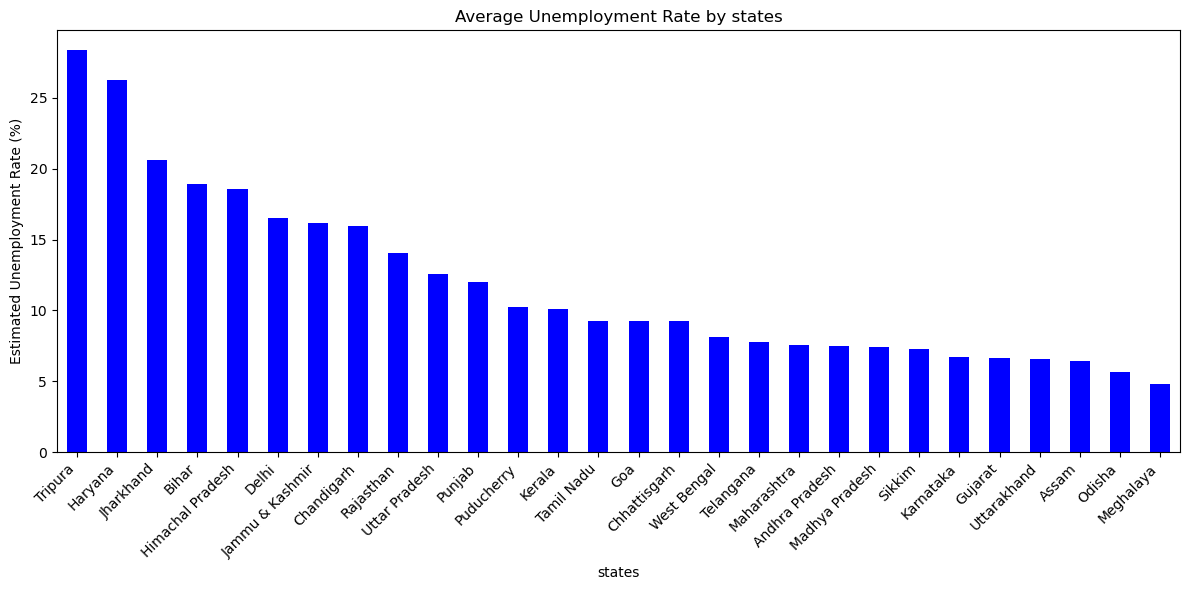

In [15]:
plt.figure(figsize=(12,6))
avg_unemployment.plot(kind='bar',color='blue')
plt.title('Average Unemployment Rate by states')
plt.xlabel('states')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

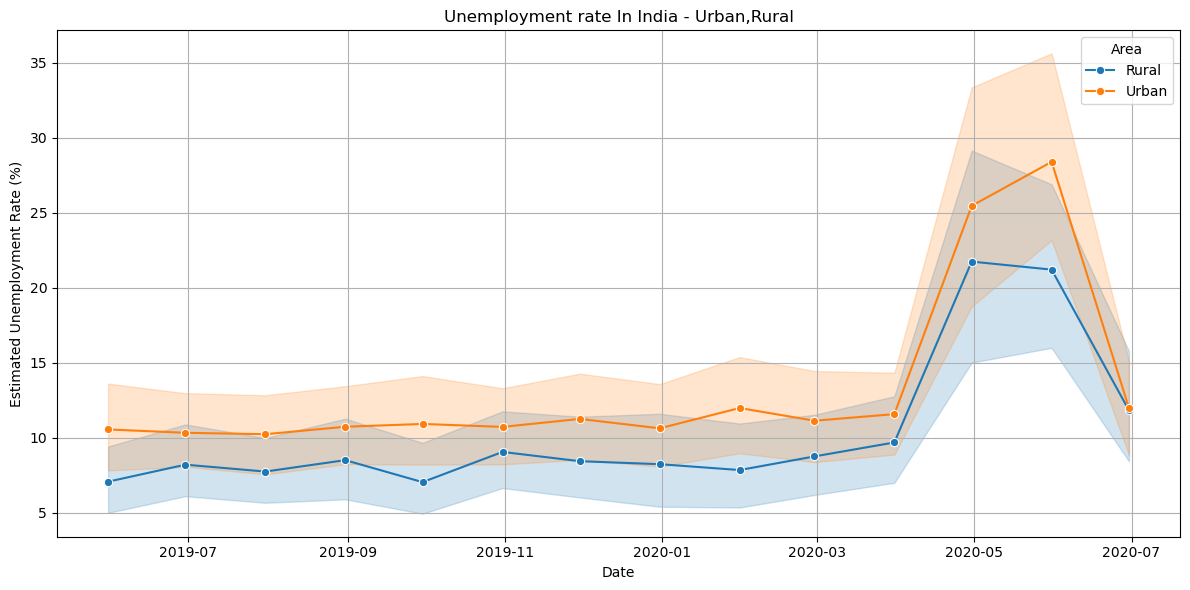

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(df1,x='Date',y='Estimated Unemployment Rate (%)',hue='Area',marker='o')
plt.title('Unemployment rate In India - Urban,Rural')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Area')
plt.grid(True)
plt.tight_layout()
plt.show()


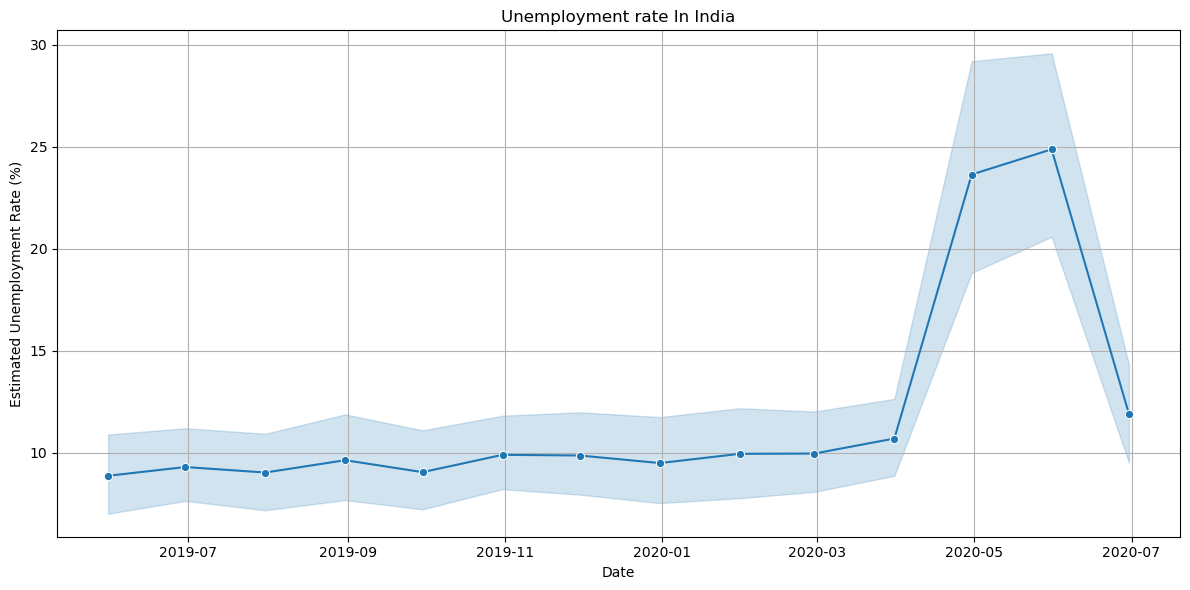

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(df1,x='Date',y='Estimated Unemployment Rate (%)',marker='o')
plt.title('Unemployment rate In India')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.color=('pink')
plt.grid(True)
plt.tight_layout()
plt.show()